## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [379]:
#Tensorflow 설치하기
# !pip install tensorflow

* 데이터 프레임 관련 라이브러리

In [380]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import *
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 모델링
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

### **나.  학습데이터 불러오기**

In [381]:
df = pd.read_csv('train_dataset_v01.csv', delimiter=',')
df.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [382]:
df_test = pd.read_csv('test_dataset_v01.csv', delimiter=',')
df_test.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,0,97,0,80.0,17.0,17.0,4,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,1,37,0,22.0,15.0,15.0,3,1,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,2,44,0,NaN,20.0,20.0,3,3,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,3,40,0,14.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,4,43,2,NaN,26.0,26.0,2,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0


### **다.  데이터 전처리**

In [383]:
df = df.replace({'benign' : 1, 'malicious' : -1}) # 결과 값 수정

In [384]:
df = df.drop('url_chinese_present', axis=1) # 값이 없어서 삭제
df = df.drop('url_hostname_len', axis=1) # Domain_Len 과 중복되어 삭제
df = df.drop('Unnamed: 0', axis=1) # 인덱스열이라 삭제
df = df.drop_duplicates() # 중복행 제거
df = df.drop("html_num_tags('applet')", axis=1) # 값이 없어서 삭제

In [385]:
df.fillna(value=0.0, inplace=True) # 결측치 빈값 채움

In [386]:
df_test = df_test.replace({'benign' : 1, 'malicious' : -1}) # 결과 값 수정
df_test = df_test.drop('url_chinese_present', axis=1) # 값이 없어서 삭제
df_test = df_test.drop('url_hostname_len', axis=1) # Domain_Len 과 중복되어 삭제
df_test = df_test.drop('Unnamed: 0', axis=1) # 인덱스열이라 삭제
df_test = df_test.drop("html_num_tags('applet')", axis=1) # 값이 없어서 삭제
# df_test = df_test.drop_duplicates() # 중복행 제거
df_test.fillna(value=0.0, inplace=True) # 결측치 빈값 채움

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [387]:
# train_test_split 사용
target = 'Result_v1'

x = df.drop(target, axis=1)
y = df.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3, random_state=2022)

### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [388]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [389]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


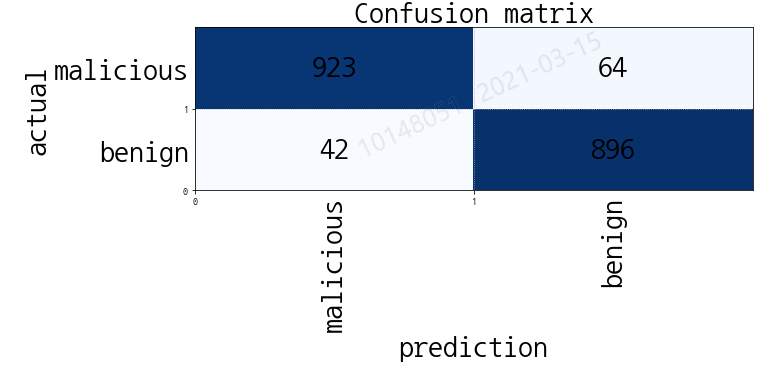

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

In [390]:
# 1. import
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier

In [391]:
# 2.선언 

params = {'max_depth' : range(10,101,10), 'min_samples_leaf' : range(100,1001,100)}
model = DecisionTreeClassifier()
model_gs_1= GridSearchCV(model, params, cv=5, verbose=3)

params = {'n_estimators' : range(20,101,20), 'subsample' : np.linspace(0.4,1,10), 'learning_rate' : np.linspace(0.1,0.5,10)}
model = GradientBoostingClassifier()
model_gs_2= GridSearchCV(model, params, cv=5, verbose=3)

params = {'n_estimators' : range(20,101,20), 'max_features' : range(1,11)}
model = RandomForestClassifier()
model_gs_3= GridSearchCV(model, params, cv=5, verbose=3)


In [392]:
# DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)
# 0.868177785729728
# GradientBoostingClassifier(learning_rate=0.32222222222222224, subsample=0.9)
# 0.9620662148964879
# RandomForestClassifier(max_features=6)
# 0.9667046869292302
# 위 결과를 가지고 다시 세부 튜닝

In [393]:
# 3. fit(), 학습
params = {'max_depth' : range(10,101,10), 'min_samples_leaf' : range(100,1001,100)}
model = DecisionTreeClassifier()
model_gs_1= GridSearchCV(model, params, cv=5, verbose=3)

model_gs_1.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .............max_depth=10, min_samples_leaf=100; total time=   0.0s
[CV 2/5] END .............max_depth=10, min_samples_leaf=100; total time=   0.0s
[CV 3/5] END .............max_depth=10, min_samples_leaf=100; total time=   0.0s
[CV 4/5] END .............max_depth=10, min_samples_leaf=100; total time=   0.0s
[CV 5/5] END .............max_depth=10, min_samples_leaf=100; total time=   0.0s
[CV 1/5] END .............max_depth=10, min_samples_leaf=200; total time=   0.0s
[CV 2/5] END .............max_depth=10, min_samples_leaf=200; total time=   0.0s
[CV 3/5] END .............max_depth=10, min_samples_leaf=200; total time=   0.0s
[CV 4/5] END .............max_depth=10, min_samples_leaf=200; total time=   0.0s
[CV 5/5] END .............max_depth=10, min_samples_leaf=200; total time=   0.0s
[CV 1/5] END .............max_depth=10, min_samples_leaf=300; total time=   0.0s
[CV 2/5] END .............max_depth=10, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(10, 101, 10),
                         'min_samples_leaf': range(100, 1001, 100)},
             verbose=3)

In [394]:
params = {'n_estimators' : range(20,101,20), 'subsample' : np.linspace(0.8,1,10), 'learning_rate' : np.linspace(0.3,0.4,10)}
model = GradientBoostingClassifier()
model_gs_2= GridSearchCV(model, params, cv=5, verbose=3)

model_gs_2.fit(x_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV 1/5] END learning_rate=0.3, n_estimators=20, subsample=0.8; total time=   0.1s
[CV 2/5] END learning_rate=0.3, n_estimators=20, subsample=0.8; total time=   0.0s
[CV 3/5] END learning_rate=0.3, n_estimators=20, subsample=0.8; total time=   0.0s
[CV 4/5] END learning_rate=0.3, n_estimators=20, subsample=0.8; total time=   0.0s
[CV 5/5] END learning_rate=0.3, n_estimators=20, subsample=0.8; total time=   0.0s
[CV 1/5] END learning_rate=0.3, n_estimators=20, subsample=0.8222222222222223; total time=   0.0s
[CV 2/5] END learning_rate=0.3, n_estimators=20, subsample=0.8222222222222223; total time=   0.0s
[CV 3/5] END learning_rate=0.3, n_estimators=20, subsample=0.8222222222222223; total time=   0.0s
[CV 4/5] END learning_rate=0.3, n_estimators=20, subsample=0.8222222222222223; total time=   0.0s
[CV 5/5] END learning_rate=0.3, n_estimators=20, subsample=0.8222222222222223; total time=   0.0s
[CV 1/5] END learning_rate=0.3,

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.3       , 0.31111111, 0.32222222, 0.33333333, 0.34444444,
       0.35555556, 0.36666667, 0.37777778, 0.38888889, 0.4       ]),
                         'n_estimators': range(20, 101, 20),
                         'subsample': array([0.8       , 0.82222222, 0.84444444, 0.86666667, 0.88888889,
       0.91111111, 0.93333333, 0.95555556, 0.97777778, 1.        ])},
             verbose=3)

In [395]:
params = {'n_estimators' : range(10,101,20), 'max_features' : range(0,7)}
model = RandomForestClassifier()
model_gs_3= GridSearchCV(model, params, cv=5, verbose=3)

model_gs_3.fit(x_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ................max_features=0, n_estimators=10; total time=   0.0s
[CV 2/5] END ................max_features=0, n_estimators=10; total time=   0.0s
[CV 3/5] END ................max_features=0, n_estimators=10; total time=   0.0s
[CV 4/5] END ................max_features=0, n_estimators=10; total time=   0.0s
[CV 5/5] END ................max_features=0, n_estimators=10; total time=   0.0s
[CV 1/5] END ................max_features=0, n_estimators=30; total time=   0.0s
[CV 2/5] END ................max_features=0, n_estimators=30; total time=   0.0s
[CV 3/5] END ................max_features=0, n_estimators=30; total time=   0.0s
[CV 4/5] END ................max_features=0, n_estimators=30; total time=   0.0s
[CV 5/5] END ................max_features=0, n_estimators=30; total time=   0.0s
[CV 1/5] END ................max_features=0, n_estimators=50; total time=   0.0s
[CV 2/5] END ................max_features=0, n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(0, 7),
                         'n_estimators': range(10, 101, 20)},
             verbose=3)

In [396]:
# stacking
estimators = [('dt', model_gs_1.best_estimator_), 
              ('grdboost', model_gs_2.best_estimator_),
              ('rf', model_gs_3.best_estimator_)]
model_stk = StackingClassifier(estimators=estimators, final_estimator=model_gs_3.best_estimator_)

In [397]:
model_stk.fit(x_train, y_train)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=100)),
                               ('grdboost',
                                GradientBoostingClassifier(learning_rate=0.37777777777777777,
                                                           n_estimators=80,
                                                           subsample=0.9333333333333333)),
                               ('rf',
                                RandomForestClassifier(max_features=1,
                                                       n_estimators=70))],
                   final_estimator=RandomForestClassifier(max_features=1,
                                                          n_estimators=70))

In [398]:
# 4. predict(), 예측, 제출용
print(model_gs_1.best_estimator_)
print(model_gs_1.best_score_)
pred1 = model_gs_1.predict(df_test)

print(model_gs_2.best_estimator_)
print(model_gs_2.best_score_)
pred2 = model_gs_2.predict(df_test)

print(model_gs_3.best_estimator_)
print(model_gs_3.best_score_)
pred3 = model_gs_3.predict(df_test)

print(model_stk.estimators_)
print(model_stk.score)
pred4 = model_stk.predict(df_test)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)
0.8571978354724648
GradientBoostingClassifier(learning_rate=0.37777777777777777, n_estimators=80,
                           subsample=0.9333333333333333)
0.9522631815429097
RandomForestClassifier(max_features=1, n_estimators=70)
0.9540233253238002
[DecisionTreeClassifier(max_depth=10, min_samples_leaf=100), GradientBoostingClassifier(learning_rate=0.37777777777777777, n_estimators=80,
                           subsample=0.9333333333333333), RandomForestClassifier(max_features=1, n_estimators=70)]
<bound method ClassifierMixin.score of StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=100)),
                               ('grdboost',
                                GradientBoostingClassifier(learning_rate=0.37777777777777777,
                                                           n_estimators=80

In [399]:
# #테스트용
print(model_gs_1.best_estimator_)
print(model_gs_1.best_score_)
pred1 = model_gs_1.predict(x_val)

print(model_gs_2.best_estimator_)
print(model_gs_2.best_score_)
pred2 = model_gs_2.predict(x_val)

print(model_gs_3.best_estimator_)
print(model_gs_3.best_score_)
pred3 = model_gs_3.predict(x_val)

print(model_stk.estimators_)
print(model_stk.score)
pred4 = model_stk.predict(x_val)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)
0.8571978354724648
GradientBoostingClassifier(learning_rate=0.37777777777777777, n_estimators=80,
                           subsample=0.9333333333333333)
0.9522631815429097
RandomForestClassifier(max_features=1, n_estimators=70)
0.9540233253238002
[DecisionTreeClassifier(max_depth=10, min_samples_leaf=100), GradientBoostingClassifier(learning_rate=0.37777777777777777, n_estimators=80,
                           subsample=0.9333333333333333), RandomForestClassifier(max_features=1, n_estimators=70)]
<bound method ClassifierMixin.score of StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=100)),
                               ('grdboost',
                                GradientBoostingClassifier(learning_rate=0.37777777777777777,
                                                           n_estimators=80

In [400]:
# train 및 val 데이터 정확도 확인 
print(classification_report(y_val, pred1))
print(classification_report(y_val, pred2))
print(classification_report(y_val, pred3))
print(classification_report(y_val, pred4))

              precision    recall  f1-score   support

          -1       0.89      0.82      0.85       484
           1       0.83      0.90      0.86       486

    accuracy                           0.86       970
   macro avg       0.86      0.86      0.86       970
weighted avg       0.86      0.86      0.86       970

              precision    recall  f1-score   support

          -1       0.96      0.95      0.95       484
           1       0.95      0.96      0.95       486

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       484
           1       0.96      0.97      0.96       486

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970

              preci

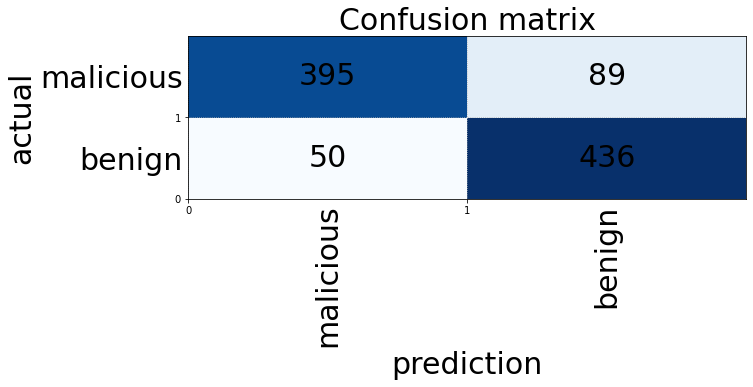

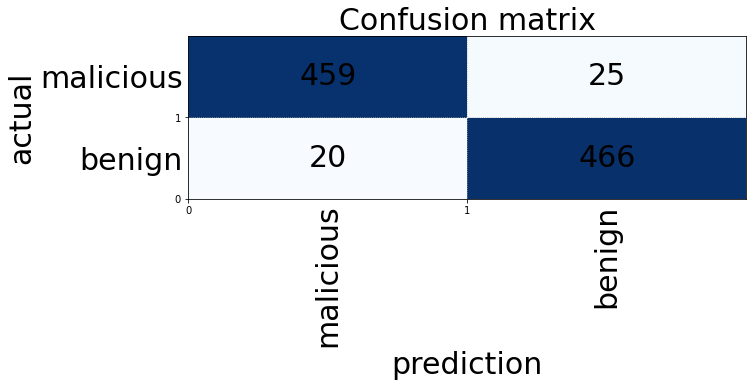

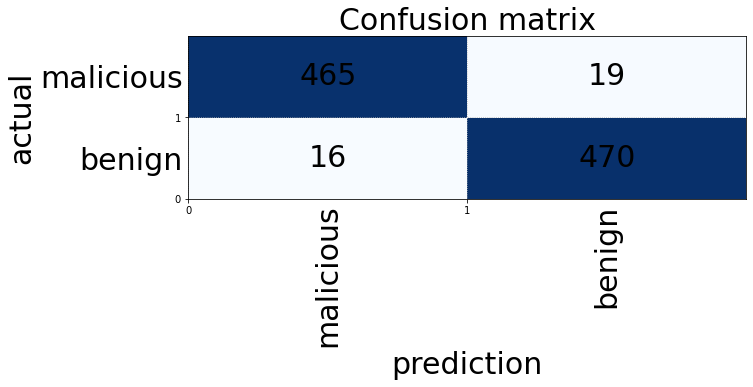

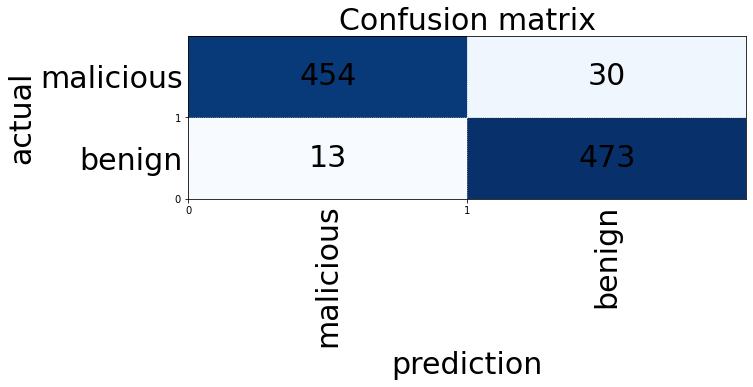

In [401]:
# # Test 데이터 결과 Confusion Matrix 확인
confusion = confusion_matrix(y_val, pred1)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

confusion = confusion_matrix(y_val, pred2)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

confusion = confusion_matrix(y_val, pred3)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

confusion = confusion_matrix(y_val, pred4)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

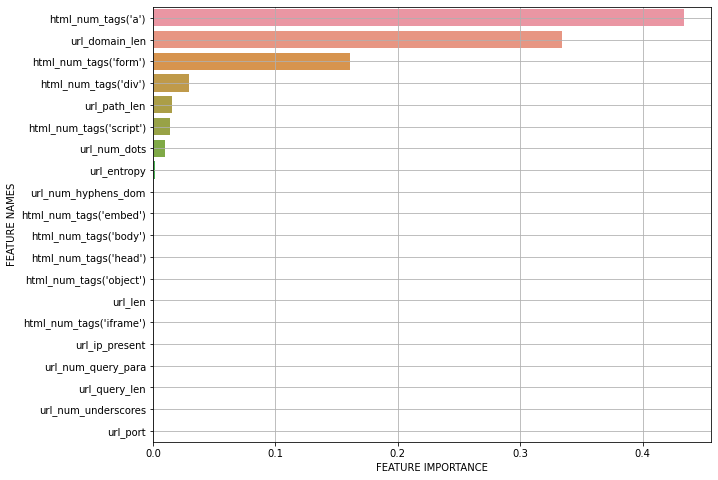

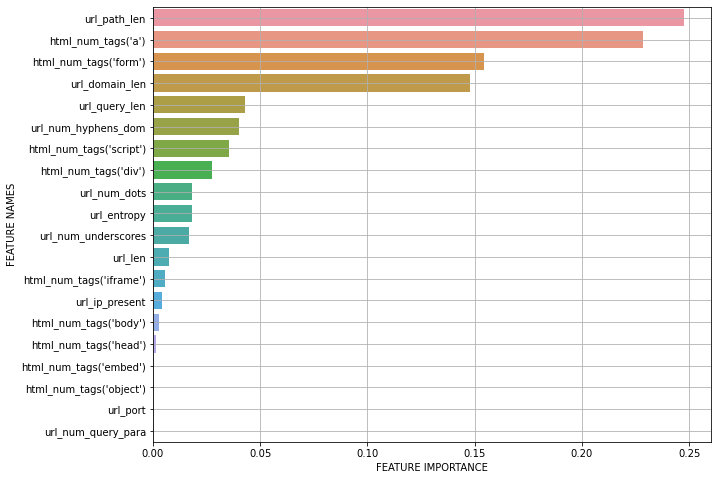

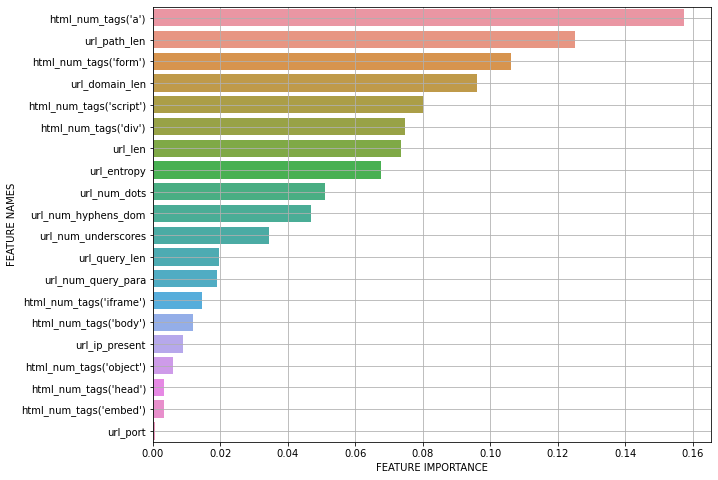

In [402]:
# Feature(특징)별 가중치 확인
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

result = plot_feature_importance(model_gs_1.best_estimator_.feature_importances_, list(x))
result = plot_feature_importance(model_gs_2.best_estimator_.feature_importances_, list(x))
result = plot_feature_importance(model_gs_3.best_estimator_.feature_importances_, list(x))

In [403]:
# 4. predict(), 예측, 제출용
pred1 = model_gs_1.predict(df_test)
pred2 = model_gs_2.predict(df_test)
pred3 = model_gs_3.predict(df_test)
pred4 = model_stk.predict(df_test)

In [404]:
sub = pd.read_csv('sample_submission.csv')

In [405]:
len(pred3)

2441

In [406]:
sub['expected'] = pred3

In [408]:
sub.to_csv('result111.csv', index=False)

In [410]:
df_test = pd.read_csv('test_dataset_v01.csv', delimiter=',')
df_test.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,0,97,0,80.0,17.0,17.0,4,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,1,37,0,22.0,15.0,15.0,3,1,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,2,44,0,NaN,20.0,20.0,3,3,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,3,40,0,14.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,4,43,2,NaN,26.0,26.0,2,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0


In [411]:
df_test.isna().sum()

Unnamed: 0                   0
url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_chinese_present          0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
html_num_tags('applet')      0
dtype: int64